In [48]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
wpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\WPI-.csv")
cpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\CPI.csv")



In [50]:
wpi_df = pd.read_csv(wpi_csv)
cpi_df = pd.read_csv(cpi_csv)

In [51]:
cpi_df.head()

,Date,Change from previous quarter (%),Annual change (%),"All groups CPI, Australia, quarterly and annual movement (%)"
0,Mar-18,0.4,1.9,NaN
1,Jun-18,0.4,2.1,NaN
2,Sep-18,0.4,1.9,NaN
3,Dec-18,0.5,1.8,NaN
4,Mar-19,0.0,1.3,NaN


In [52]:
wpi_df.head()

,Date,Quarterly (%),Annual (%),"All sector WPI, quarterly and annual movement (%), seasonally adjusted (a)"
0,Mar-18,0.5,2.0,NaN
1,Jun-18,0.6,2.1,NaN
2,Sep-18,0.6,2.3,NaN
3,Dec-18,0.5,2.3,NaN
4,Mar-19,0.5,2.3,NaN


In [53]:
cpi_data = {
    'Date_cpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_cpi': [1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4]
}

wpi_data = {
    'Date_wpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_wpi': [2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4]
}

cpi_df = pd.DataFrame(cpi_data)
wpi_df = pd.DataFrame(wpi_data)

In [54]:
data_df = pd.merge(cpi_df, wpi_df, left_on='Date_cpi', right_on='Date_wpi')

data_df

,Date_cpi,Value_cpi,Date_wpi,Value_wpi
0,Mar-18,1.9,Mar-18,2.0
1,Jun-18,2.1,Jun-18,2.1
2,Sep-18,1.9,Sep-18,2.3
3,Dec-18,1.8,Dec-18,2.3
4,Mar-19,1.3,Mar-19,2.3
5,Jun-19,1.6,Jun-19,2.3
6,Sep-19,1.7,Sep-19,2.2
7,Dec-19,1.8,Dec-19,2.2
8,Mar-20,2.2,Mar-20,2.2
9,Jun-20,-0.3,Jun-20,1.8


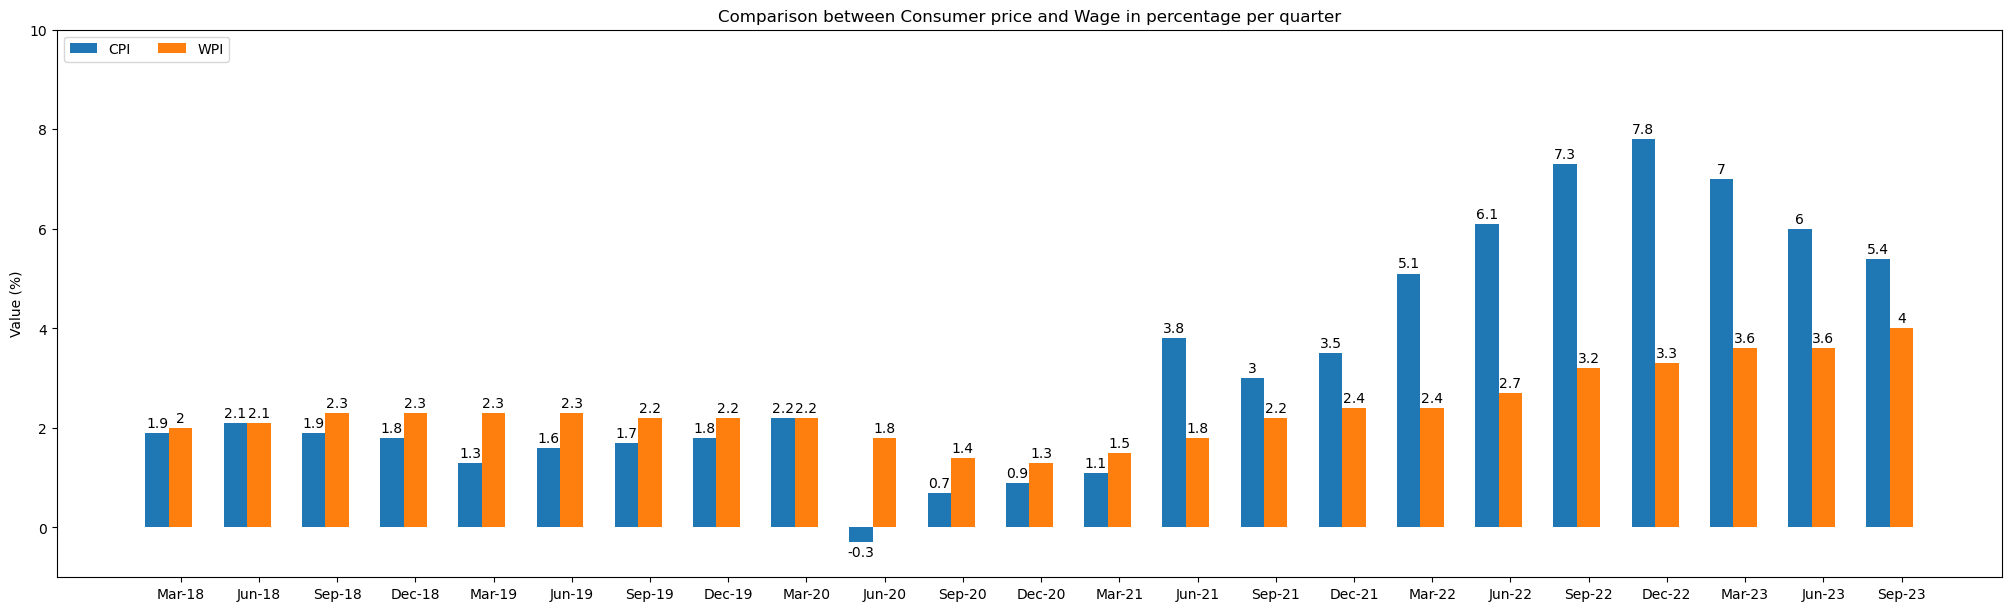

In [60]:
date = ('Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23')
value= {'CPI':(1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4), 
        'WPI':(2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4)
       }

x = np.arange(len(date))

# the width of the bars

width = 0.30  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value (%)')
ax.set_title('Comparison between Consumer price and Wage in percentage per quarter')
ax.set_xticks(x + width, date)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 10)
fig.set_size_inches(20, 6)

plt.show()


